<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [9]:
# Code:
alist = [1,2,3,4,5,6]
def cal_mean(alist):
    alistmean = sum(alist)/len(alist)
    return alistmean

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [10]:
# Code:
def cal_std(alist):
    alistmean = sum(alist)/len(alist)
    counter = 0
    for x in alist:
        counter += ((x - alistmean) ** 2)/len(alist)
    return counter ** 0.5

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [11]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [22]:
# Code:
highest_daily_rainfall = pd.read_csv('data/rainfall-monthly-highest-daily-total.csv')
no_of_rain_monthly = pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv')
total_monthly_rainfall = pd.read_csv('data/rainfall-monthly-total.csv')
mean_relative_humidity = pd.read_csv('data/relative-humidity-monthly-mean.csv')
sunshine_duration = pd.read_csv('data/sunshine-duration-monthly-mean-daily-duration.csv')
surface_air_temp = pd.read_csv('data/surface-air-temperature-monthly-mean.csv')
wet_bulb_temp = pd.read_csv('data/wet-bulb-temperature-hourly.csv')
profile = pd.read_excel('data/tourism-industry-profile-monthly.xlsx', sheet_name = 'T1')

In [149]:
profile

,Data Series,2023 Mar,2023 Feb,2023 Jan,2022 Dec,2022 Nov,2022 Oct,2022 Sep,2022 Aug,2022 Jul,...,1978 Oct,1978 Sep,1978 Aug,1978 Jul,1978 Jun,1978 May,1978 Apr,1978 Mar,1978 Feb,1978 Jan
0,Total International Visitor Arrivals By Inboun...,1021028,957822,931670,931441,816340,816833,782215,728744,726739,...,177639,167980,201355,175968,149896,162667,162400,163199,147954,167016
1,Southeast Asia,414932,376492,362229,438856,358257,374927,340369,315820,332161,...,71707,75304,82899,73672,67746,68036,73782,63299,57650,64500
2,Brunei Darussalam,4460,4739,3653,7324,4273,3733,3809,3426,3239,...,na,na,na,na,na,na,na,na,na,na
3,Indonesia,171507,156448,168965,197261,144444,133408,120169,108252,119086,...,na,na,na,na,na,na,na,na,na,na
4,Malaysia,97835,88040,72751,95475,72305,77092,81914,63905,61575,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Egypt,168,205,192,220,283,259,255,197,164,...,na,na,na,na,na,na,na,na,na,na
58,Mauritius,474,274,418,643,663,226,210,198,196,...,na,na,na,na,na,na,na,na,na,na
59,South Africa (Rep Of),1995,1698,2229,3371,1591,1565,1949,1233,1281,...,na,na,na,na,na,na,na,na,na,na
60,Other Markets In Africa,1663,1896,1343,2100,1729,1688,1299,1275,941,...,na,na,na,na,na,na,na,na,na,na


In [66]:
visit_stat_10 = profile.loc[:, '2019 Dec':'2009 Jan']
visit_stat_10 = pd.concat([profile.iloc[:,0], visit_stat_10], axis=1)

In [67]:
visit_stat_10_by_region = visit_stat_10.iloc[[1, 10, 15, 25, 32, 36, 52, 56], :]

In [90]:
visit_stat_10_by_region = visit_stat_10_by_region.T.iloc[::-1]
#visit_stat_10_by_regionT = pd.concat([visit_stat_10_by_region.loc['Data Series'].to_frame().T, visit_stat_10_by_region.iloc[:-1,:]])

In [135]:
#visit_stat_10_by_region = visit_stat_10_by_region.T

#visit_stat_10_by_region.columns = visit_stat_10_by_region.loc['Data Series']
visit_stat_10_by_region = visit_stat_10_by_region.iloc[:-1]
visit_stat_10_by_region = visit_stat_10_by_region.rename(columns = {'Data Series': 'Year Month'})

In [148]:
visit_stat_10_by_region

Data Series,Africa,Oceania,Europe,Americas,West Asia,North Asia,Greater China,Southeast Asia
2009 Jan,6874,88918,116663,38044,7109,63943,145972,243584
2009 Feb,4438,56345,116089,35014,7176,70257,113312,231174
2009 Mar,5570,60594,130029,41421,14730,67628,125937,283896
2009 Apr,6044,72719,108721,36347,7817,53014,128044,292558
2009 May,5007,68000,82992,33982,7251,51730,86145,286750
...,...,...,...,...,...,...,...,...
2019 Aug,8289,99796,203813,71328,22847,173762,499809,520958
2019 Sep,7961,127327,159864,64342,11778,132515,318888,511664
2019 Oct,6697,112052,164050,68654,12276,136707,331072,555996
2019 Nov,7472,100883,179959,82972,12438,125534,319671,565680


In [151]:
visit_stat_10_by_region

Data Series,Africa,Oceania,Europe,Americas,West Asia,North Asia,Greater China,Southeast Asia
2009 Jan,6874,88918,116663,38044,7109,63943,145972,243584
2009 Feb,4438,56345,116089,35014,7176,70257,113312,231174
2009 Mar,5570,60594,130029,41421,14730,67628,125937,283896
2009 Apr,6044,72719,108721,36347,7817,53014,128044,292558
2009 May,5007,68000,82992,33982,7251,51730,86145,286750
...,...,...,...,...,...,...,...,...
2019 Aug,8289,99796,203813,71328,22847,173762,499809,520958
2019 Sep,7961,127327,159864,64342,11778,132515,318888,511664
2019 Oct,6697,112052,164050,68654,12276,136707,331072,555996
2019 Nov,7472,100883,179959,82972,12438,125534,319671,565680


In [222]:
visit_stat_10_by_region['Year'] = visit_stat_10_by_region.index

In [223]:
visit_stat_10_by_region.index

Index(['2009 Jan', '2009 Feb', '2009 Mar', '2009 Apr', '2009 May', '2009 Jun',
       '2009 Jul', '2009 Aug', '2009 Sep', '2009 Oct',
       ...
       '2019 Mar', '2019 Apr', '2019 May', '2019 Jun', '2019 Jul', '2019 Aug',
       '2019 Sep', '2019 Oct', '2019 Nov', '2019 Dec'],
      dtype='object', length=132)

In [224]:
visit_stat_10_by_region[['Year', 'Month']] = visit_stat_10_by_region['Year'].str.split(" ", expand = True)

In [225]:
visit_stat_10_by_region


Data Series,Africa,Oceania,Europe,Americas,West Asia,North Asia,Greater China,Southeast Asia,Year,Month
2009 Jan,6874,88918,116663,38044,7109,63943,145972,243584,2009,Jan
2009 Feb,4438,56345,116089,35014,7176,70257,113312,231174,2009,Feb
2009 Mar,5570,60594,130029,41421,14730,67628,125937,283896,2009,Mar
2009 Apr,6044,72719,108721,36347,7817,53014,128044,292558,2009,Apr
2009 May,5007,68000,82992,33982,7251,51730,86145,286750,2009,May
...,...,...,...,...,...,...,...,...,...,...
2019 Aug,8289,99796,203813,71328,22847,173762,499809,520958,2019,Aug
2019 Sep,7961,127327,159864,64342,11778,132515,318888,511664,2019,Sep
2019 Oct,6697,112052,164050,68654,12276,136707,331072,555996,2019,Oct
2019 Nov,7472,100883,179959,82972,12438,125534,319671,565680,2019,Nov


In [229]:
visit_stat_10_by_region[visit_stat_10_by_region['Year']=='2019']

Data Series,Africa,Oceania,Europe,Americas,West Asia,North Asia,Greater China,Southeast Asia,Year,Month
2019 Jan,7083,137660,224478,92393,11527,139127,393850,491810,2019,Jan
2019 Feb,4480,74454,213198,77043,9935,132146,423941,455405,2019,Feb
2019 Mar,6106,83730,213342,91115,15025,131235,365215,530303,2019,Mar
2019 Apr,7247,124189,181375,75440,14102,104688,389376,554453,2019,Apr
2019 May,4961,94996,119900,69238,8729,102715,349842,535242,2019,May
2019 Jun,6787,104003,110587,81305,14877,102441,338988,622117,2019,Jun
2019 Jul,7548,127346,173060,88663,20611,130551,498897,617788,2019,Jul
2019 Aug,8289,99796,203813,71328,22847,173762,499809,520958,2019,Aug
2019 Sep,7961,127327,159864,64342,11778,132515,318888,511664,2019,Sep
2019 Oct,6697,112052,164050,68654,12276,136707,331072,555996,2019,Oct


<AxesSubplot:>

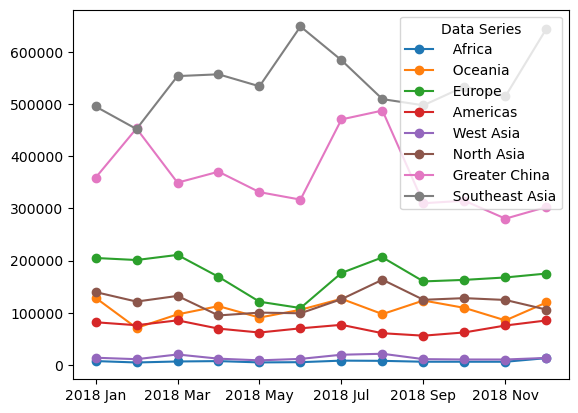

In [276]:
visit_stat_10_by_region[visit_stat_10_by_region['Year']=='2018'].plot(marker = 'o')

In [233]:
no_of_rain_monthly[['year', 'month']] = no_of_rain_monthly['month'].str.split('-', expand = True)

In [253]:
no_of_rain_monthly['date'] = no_of_rain_monthly['month']
no_of_rain_monthly[['year', 'month']] = no_of_rain_monthly['date'].str.split('-', expand = True)

In [260]:
no_of_rain_monthly['date'].replace('-',' ', inplace = True, regex=True)


In [339]:
no_of_rain_monthly[no_of_rain_monthly['year']=='2018']['no_of_rainy_days'].corr(visit_stat_10_by_region[visit_stat_10_by_region['Year']=='2018']['Africa'].astype('int64'))

nan

In [333]:
visit_stat_10_by_region[visit_stat_10_by_region['Year']=='2018']['Africa'].astype('int64')

2018 Jan     7433
2018 Feb     4715
2018 Mar     6648
2018 Apr     7346
2018 May     4851
2018 Jun     5287
2018 Jul     8256
2018 Aug     7834
2018 Sep     6146
2018 Oct     6129
2018 Nov     6088
2018 Dec    13072
Name: Africa, dtype: int64

In [332]:
no_of_rain_monthly[no_of_rain_monthly['year']=='2018']['no_of_rainy_days']

432    25
433     5
434    10
435    14
436    19
437    17
438    10
439    11
440    13
441    18
442    27
443    19
Name: no_of_rainy_days, dtype: int64

([<matplotlib.axis.XTick at 0x2258a3a7610>,
 [Text(432.0, 0, 'Jan'),
  Text(435.0, 0, 'Apr'),
  Text(438.0, 0, 'Jul'),
  Text(441.0, 0, 'Oct')])

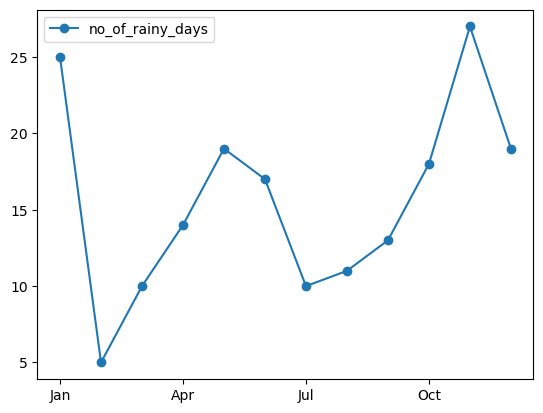

In [275]:
no_of_rain_monthly[no_of_rain_monthly['year']=='2018'].plot(marker='o')
plt.xticks(ticks = [432., 435., 438., 441.], labels= ['Jan', 'Apr', 'Jul', 'Oct'] )

<AxesSubplot:>

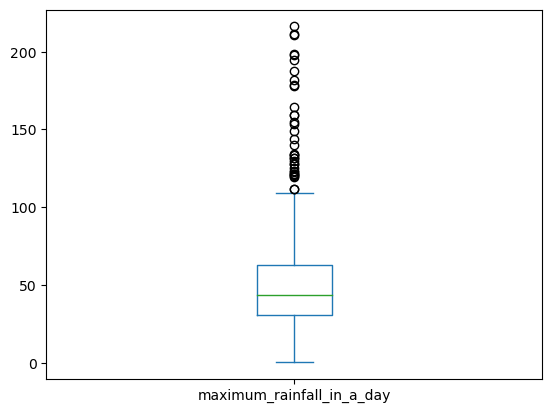

In [14]:
# Code:
highest_daily_rainfall.plot(kind = 'box')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [15]:
#Code:


**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


In [16]:
# Code

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!